# ELASTICA PROBLEM FORMULATION OF A COLUMN WITH ONE END FIXED      AND OTHER END FREE

Why we need a complex Elastica Problem when we have Euler's theory for columns ?

Although Eulers Theory determines the critical load exactly which causes a column to buckle,the theory says that the column is stable when it is loaded beyond the critical load i.e, it is failed to capture the phenomena after critical load.In the elastica problem we correct that phenomena by taking the exact expression for radius of curvature which has been approximated in Euler theory.

The things which will make the elastica problem challenging are the non-linearities present in the equation due to exact radius of curvature expression.Elastica problem does not deal with the reference configuration rather it is formulated in the deformed configuration, hence we use the coordinate system which helps us to loacte a point on a space curve.The notation of some of the terms are as follows:

\begin{align*}
        s &- Arc\:length\:parameter(Deformed\:configuration)\\
        \theta &- Slope(Angle)\:of\:tangent\:with\:X-axis\:at\:particular\:s\\
        \frac{{\rm d} \theta}{{\rm d} s} &- Curvature\:at\:particular\:s\\
        F(p,\phi) &- \int_0^{\phi} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = Incomplete\;Elliptic\; Integral\; of\; 1st\; Kind\\
        K(p) &- \int_0^{\frac{\pi}{2}} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = Complete\;Elliptic\; Integral\; of\; 1st\; Kind\\
        E(p,\phi) &- \int_0^{\phi} \sqrt{1-p^2 \sin^2 \phi}\;{\rm d} \phi = Incomplete\;Elliptic\; Integral\; of\; 2nd\; Kind\\
        E(p) &- \int_0^{\frac{\pi}{2}} \sqrt{1-p^2 \sin^2 \phi}\;{\rm d} \phi = Complete\;Elliptic\; Integral\; of\; 2nd\; Kind\\
        \\
        \\
        &FORMULATION\;OF\;PROBLEM
\end{align*}


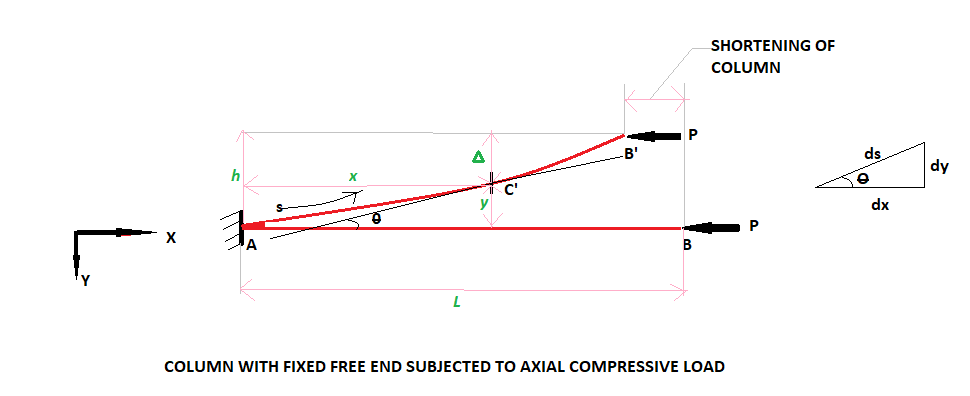

The governing differential equation for the coulmn fixed at one end and free at other end is as follows :
\begin{align*}
    M &= EI \frac{{\rm d} \theta}{{\rm d} s} = P\Delta\\
    Where\;M&-Bending\;Moment\;at\;C\\
    EI &-\;Flexural\;Rigidity\\
    P &-\;External\;Load\;Applied\;at\;B\\
\end{align*}
Differentiating the above equation with respect to s<br>
\begin{aligned}
        \frac{{\rm d^2} \theta}{{\rm d} s^2} &= \frac{P}{EI} \frac{{\rm d} \Delta}{{\rm d} s}\\
        \\
        Here , y &= h-\Delta\\
        \\
        Therefore,\sin \theta&=\frac{{\rm d} y}{{\rm d} s} =-\frac{{\rm d} \Delta}{{\rm d} s}\\
        \\
        \frac{{\rm d^2} \theta}{{\rm d} s^2}+\frac{P}{EI} \sin \theta &= 0
\end{aligned}


Boundary Conditions are as follows :<br>

\begin{gather}
    1) At\,s=0 , \theta = 0
\end{gather}
\begin{gather}
    2) At\,s=L ,\frac{{\rm d} \theta}{{\rm d} s}=0
\end{gather}

The solution procedure for the above 2nd order non linear differential equation is presented in the book "Solid Mechanics-A Variational Approach by Dym and Shames".More detailed procedure is given in it.In solving the above  equation we reach a point where we get
\begin{align*}
    {\rm d} s &=\frac{1}{2\sqrt{k}}  \frac{{\rm d} \theta}{\sqrt{[( \cos \theta-\cos \theta_{{0}})]}}\\
    where\;k &= \sqrt{\frac{P}{EI}} &&\\
        \theta_{{0}} &- Slope(Angle)\:of\:tangent\:with\:X-axis\:at\:s=L &&\\
\end{align*}

Here, we make an ASSUMPTION in the elastica that there is no streching in the column.The assumption enables that the length of the column does not change even after deformation.Hence if we integrate throughout the arc length paramter 's' we should be able to obtain the length of the column.
\begin{gather}
    \int_0^{L} {\rm d} s = L =\frac{1}{2k}  \int_0^{\theta_{{0}}} \frac{{\rm d} \theta}{\sqrt{[(\sin \frac{\theta_{{0}}}{2})]^2-[(\sin \frac{\theta}{2})]^2}} 
\end{gather}
Now we wish to convert the following inetgral into elliptical integral by making the following substitutions
\begin{gather}
    \begin{aligned}
         \sin \frac{\theta_{{0}}}{2} &= p \\
         \sin \frac{\theta}{2} &= p \sin \phi
    \end{aligned}
\end{gather}
By making the above substitutions we get
\begin{gather}
    \begin{aligned}
        \sqrt{\frac{P}{P_{{e}}}} &= \frac{2}{\pi} \int_0^{\pi/2} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = \frac{2}{\pi} K(p)\\
        Where\;P_{{e}}\:&= \:\frac{\pi^2EI}{4L^2}
    \end{aligned}
\end{gather}
The above integral represented by K(p) is called as complete elliptic integral of 1st Kind.Here,"p" is called the modulus of the integral.For a given value of (P/Pe) we can solve above equation numerically for "p" and there by we can go for slope and displacements.

Here the another ASSUMPTION is that the problem we are trying to solve is assumed to be UNDULATING ELASTICA i.e, p<1

The procedure for obtaining p and displacements is demonstrated as follows:

\begin{gather}
    SOLUTION\;OF\;PROBLEM
\end{gather}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk
from scipy.special import ellipe
from scipy.special import ellipkinc
from scipy.special import ellipeinc
from scipy.optimize import root
from scipy.optimize import minimize

Defining the function that needs to be solved to obtain modulus"p" 

In [2]:
P_by_Pe = 1.2               #Input the value of load here w.r.t critical load Pe
def fun_mod(p) :
    return P_by_Pe-((2/(np.pi))*ellipk(p**2))**2

Since we are dealing with undulating elastica(p<1),we can input the values of p in between 0 to 1 in a loop to get an idea about the location of root.

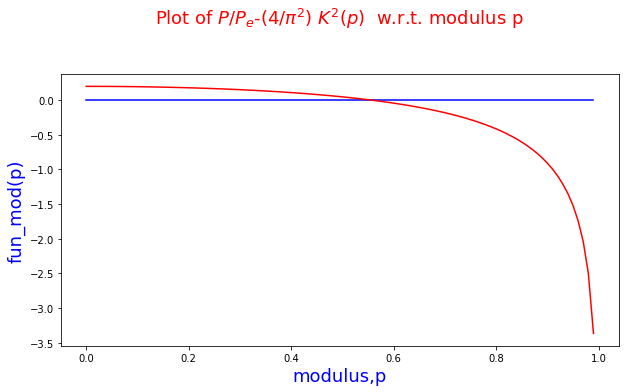

In [3]:
count = 0
N = 100
res = []


p_values = []
for p_trial in np.arange(0,1,1/N):
    res.append(fun_mod(p_trial))
    p_values.append(p_trial)
    count = count + 1

plt.figure(1,figsize=(10,5))
plt.title('Plot of $ P/P_e $-(4/$\pi^2$) $K^2(p)$  w.r.t. modulus p \n\n',color ='r',fontsize='18')
plt.xlabel('modulus,p' ,color='b',fontsize=18) 
plt.ylabel('fun_mod(p)',color='b',fontsize=18)
plt.plot(p_values,np.zeros(count),color = 'b')
plt.plot(p_values,res,color = 'r')

Now by using root function in scipy optimization we can obtain an more accurate approximated value of "p".Above graph helps in providing the intial guess. 

In [4]:
soln = root(fun_mod,0.6)
p = soln.x[0]
display(p)

0.5581878470466568

After obtaining "p" we can get the slope,x&y deflections at the end of the column by using the following relation
\begin{align*}
        (1)\;\;\theta_{{0}}&=2\sin^{-1}(p) \\
        \\
        (2)\;\;\Delta&= \frac{-EI}{P}\frac{{\rm d} \theta}{{\rm d} s}\\
        \\
        Substituting\;from\;above\;expressions\;\Delta&= \frac{-2p\cos\phi}{k}\\
        At\;\phi = 0,y=0\;implies\;h = y_{{end}}&= \frac{-2p}{k}\\
        \\
        (3)\;\;y&=-(\frac{2p}{k}-\frac{2p\cos \phi }{k})\\
        Similarly\;for\;x\;defelection\;we\;can\;use\\
        (4)\;{\rm d} x &= {\rm d} s\cos \theta\\
        \\
        {\rm d} x &= \frac{( 1 - 2p^2 \sin^2 \phi) {\rm d} \phi}{k \sqrt {(1 - p^2 \sin^2 \phi)}}\\
        \\
        x &= \frac{1}{k}  \int_0^{\phi} \frac{{\rm d} \phi}{ \sqrt {(1 - p^2 \sin^2 \phi)}} - \frac{2 p^2}{k} \int_0^{\phi} \frac{ \sin^2 \phi {\rm d} \phi}{ \sqrt {(1 - p^2 \sin^2 \phi)}}\\
        \\
        x &= 2 \frac {E(p, \phi)}{k} -  \frac {F(p, \phi)}{k}\\
        \\
        x_{{end}} &= 2 \frac {E(p)}{k} - L\\
        \\
        Shortening\;of\;column,\;u &= 2L-2 \frac {E(p)}{k}\\
\end{align*}

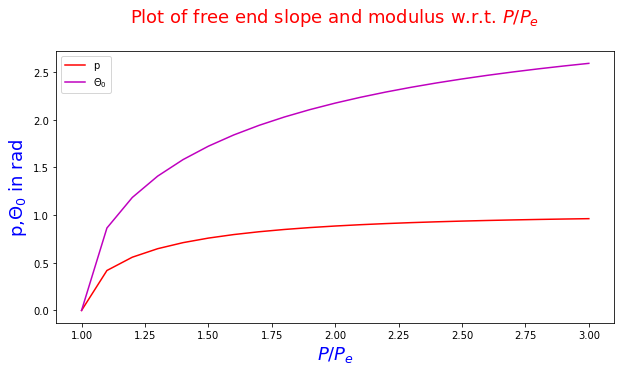

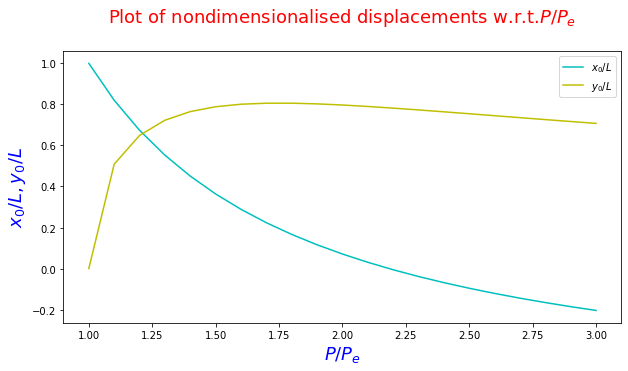

In [5]:
#Parameters of the code:
P_by_Pe = 1.0             #Starting value of non dimensionialised load
n = 21                    #No. of iterations
dp = 0.1                  #size of each iteration

#Declaration of variables:
p = np.zeros(n)
theta_0 = np.zeros(n)
y_end_by_L = np.zeros(n)
x_end_by_L = np.zeros(n)
X = np.zeros(n)

for j in range(0,n):
    soln = root(fun_mod,0.99)
    p[j] = soln.x[0]
    
    #slope at the free end
    theta_0[j] = 2*np.arcsin(p[j])
    
    #Nondimesionialised y displacement at free end(Only magnitude is required hence neglected - sign)
    y_end_by_L[j] = 2*p[j]/ellipk(p[j]**2)
    
    #Nondimensionliasied x displacement at free end(Measure of shortening of column)
    x_end_by_L[j] = 2*ellipe(p[j]**2)/ellipk(p[j]**2)-1
    
    X[j] = P_by_Pe
    P_by_Pe = P_by_Pe+dp
    
#Plotting of graphs:
plt.figure(1,figsize=(10,5))
plt.title('Plot of free end slope and modulus w.r.t. $ P/P_e $ \n',fontsize=18 ,color='r')
plt.xlabel('$ P/P_e $' ,color='b',fontsize=18) 
plt.ylabel('p,$ \Theta_0 $ in rad',color='b',fontsize=18)
plt.plot(X,p,label = 'p',color = 'r')
plt.plot(X,theta_0,label= '$ \Theta_0 $',color='m')
plt.legend()

plt.figure(2,figsize=(10,5))
plt.title('Plot of nondimensionalised displacements w.r.t.$ P/P_e $ \n',fontsize=18 ,color='r')
plt.xlabel('$ P/P_e $' ,color='b',fontsize=18) 
plt.ylabel('$ x_0/L,y_0/L $',color='b',fontsize=18)
plt.plot(X,x_end_by_L,label = '$ x_0/L $',color = 'c')
plt.plot(X,y_end_by_L,label = '$ y_0/L $',color = 'y')
plt.legend()

As we can see from the graph that y_end displacement is increasing and reaches a maximum value before it starts decreasing.Hence,our next objective is to obtain the load corresponding to maximum end displacement of y.For this we have to maximize the following function:
\begin{gather}
        \frac {h}{L} = \frac{2p}{K(p)} = \zeta (p)
\end{gather}
Differentiating with respect to p:
\begin{gather}
        \frac{{\rm} d [\zeta (p)]}{{\rm d}p} = \frac{[2 K(p) - 2p K' (p)]}{K^2 (p)}=0
\end{gather}

\begin{gather}
        K(p) = p K' (p) = \frac{B(p)}{(1 - p^2)}
\end{gather}
where
\begin{gather}
        B(p) = \int_0^{\pi/2} \frac{ \cos^2 \phi {\rm d} \phi}{\sqrt {(1 - p^2 \sin^2 \phi)}}
\end{gather}

In scipy we can utilise the minimize function from optimisation library to find the minimum value of a given function.But here our objective is to maximize the above function.Therefore,the strategy employed here to find the minimum of the reciprocal which gives us the maximum value we required

In [6]:
def fun_L_by_h(p):
    return ellipk(p**2)/(2*p)

sol = minimize(fun_L_by_h,0.1,method='SLSQP')
p = sol.x[0]
P_by_Pe = (2*ellipk(p**2)/np.pi)**2

print("p :",p)
print("P/Pe :",P_by_Pe)
print("y_max/L :",1/sol.fun)



p : 0.8376237670879232
P/Pe : 1.7496297188034509
y_max/L : 0.8062802779912862


The final objective in this problem is to find the deflected shape of the column by varying the loads in a loop.Before obtaining the deflected shape we have to obtain the coordinates(x,y)i.e, deflections for each material point.

The x,y deflections are given in above equations which are functions of phi,angular parameter of elliptic integrals which inturn depends on "s"-arc length parameter varying from 0 to L.

The equation for phi in terms of s is given as:
\begin{gather}
    s = \frac{1}{k} \int_0^{\phi} \frac{{\rm d} \phi}{\sqrt{1-p^2 \sin^2 \phi}} = \frac{1}{k} F[p, ϕ]
\end{gather}
Therefore,for a given value of s from 0 to L we can find the corrsponding $ \phi $ and hence,the x,y deflections.Thereby we obtain the deflected shape of column.

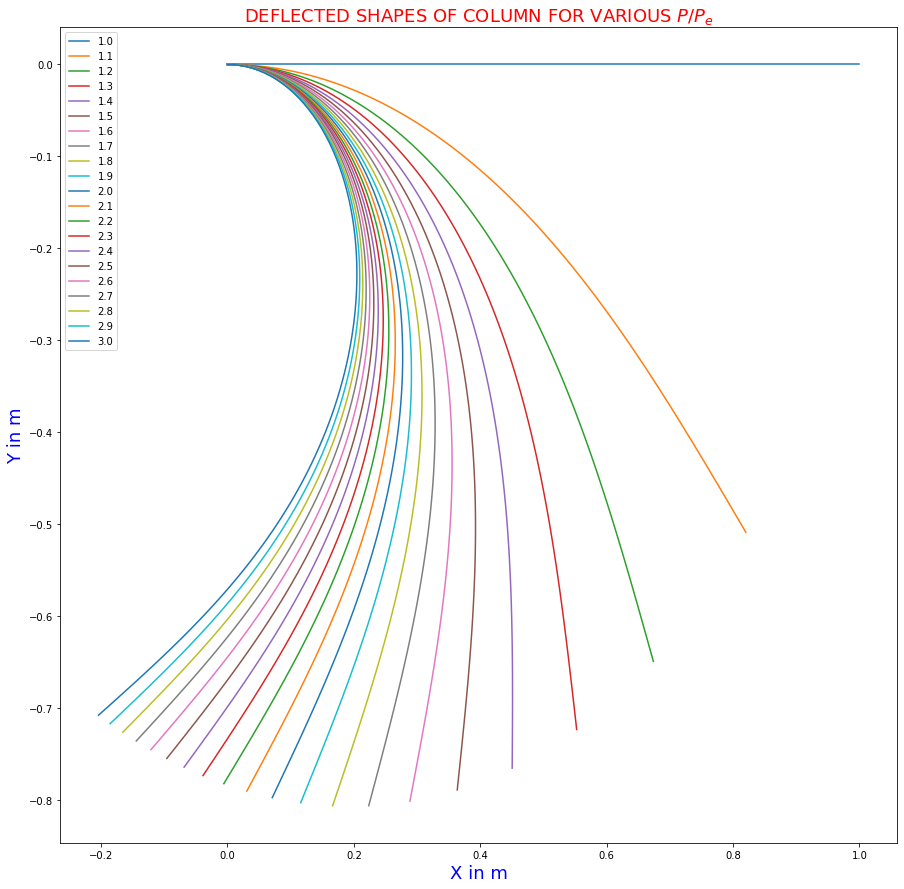

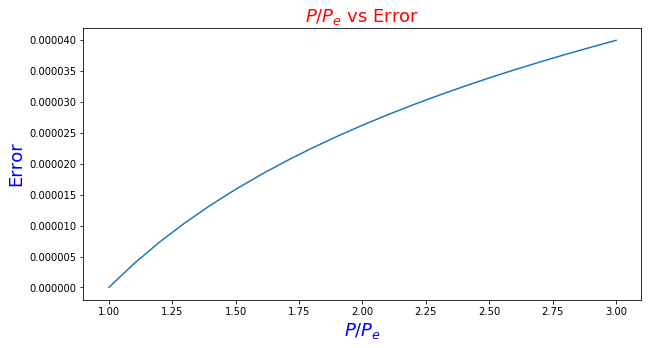

In [7]:
#parameters of code:
n=21                  #No of iterations
m=101                 #No of points choosen on column to get deflected shape
P_by_Pe = 1.0         #Non dimensionliased Load
dp = 0.1              #Load increment per each iteration
L = 1                 #Length of the column(choose 1 to get non dimensionliased displacements)

#Declaration of variables
s = np.zeros(m)
phi = np.zeros(m)
y_def = np.zeros(m)
x_def = np.zeros(m)
theta = np.zeros(m)
X = []
Y = []



def fun_phi(phi) :
    return (k*s[i])-ellipkinc(phi,p**2)

plt.figure(1,figsize=(15,15))
plt.title("DEFLECTED SHAPES OF COLUMN FOR VARIOUS $ P/P_e $",fontsize=18 ,color='r')
plt.xlabel('X in m' ,color='b',fontsize=18) 
plt.ylabel('Y in m',color='b',fontsize=18)

for j in range(0,n):
    
    soln = root(fun_mod,0.99)
    p = soln.x[0]
    
    k = ellipk(p**2)/L
    
    for i in range(0,m):
        s[i] = (i/100)*L
        
        sol = root(fun_phi,0.99)
        phi[i] = sol.x[0]
        
        #Deflections and slope
        y_def[i] = -2*p*(1-np.cos(phi[i]))/k
        x_def[i] = (2*(ellipeinc(phi[i],p**2))-ellipkinc(phi[i],p**2))/k
        theta[i] = 2*np.arcsin(p*np.sin(phi[i]))
    
    plt.plot(x_def,y_def,label = round(float(P_by_Pe),2))
    plt.legend()
    
    L_total = 0.0
    for i in range(0,100):
        ds = np.sqrt(pow((x_def[i+1]-x_def[i]),2)+pow((y_def[i+1]-y_def[i]),2))
        L_total = L_total+ds
    error = L-L_total
    X.append(P_by_Pe)
    Y.append(error)
    
    P_by_Pe = P_by_Pe + dp
    
plt.figure(2,figsize=(10,5))
plt.title("$ P/P_e $ vs Error" ,fontsize=18 ,color='r')
plt.xlabel('$ P/P_e $' ,color='b',fontsize=18) 
plt.ylabel('Error',color='b',fontsize=18)
plt.plot(X,Y)

To check whether the obtained deflected shape to be correct or not we can use the assumption we followed that there is no streching in the column i.e, length remains constant.Therefore
\begin{align*}
    {\rm d} s\;&=\;\sqrt {({\rm d} x)^2\;+\;({\rm d} y)^2}\\
    Error\;&= \;L\;-\int_0^{L}  {\rm d} s
\end{align*}
By using above relation and the (x,y)deflections,we will obtain 'ds' and addition of all such 'ds' will contribute to total length of column.Then,we can calculate error as difference between the choosen Length and the obtained Length.
By plotting the graph for error and load,we can see that the error is of 4th order and increases as load increases which is obivious since the curvature increases and the 'ds' approximation based on above equation does not hold good

In the similar way,the elastica problem can be solved for the columns with other boundary conditions too.This is the case of undulating elastica(p<1)

Here,we can go further for nodal elastica(p>1)where load(P) cannot be applied directly on the column but through a rigid lever i.e, a case of both load and a moment.
And when p=1, the length of the column tends to be infinity which means the load is applied at infinity, called the infinity bar problem